In [1]:
#%matplotlib notebook  
from matplotlib import pyplot as plt
import numpy as np
import pasttrec_ctrl as ptc
import json
import sigproc_kit
import tdc_daq as td
import baseline_calib
import ROOT
import db
from cw_pasttrec_functions import *

from my_utils import *
set_width_max_of_jupyterpad()

    
def hist_rms(x,y):
  counts = np.sum(y)
  weights = y / counts
  mean = np.dot(x,weights)
  deviations = x - mean
  return np.sqrt(np.dot(deviations**2,weights))
def list_rms(x):
  mean = sum(x)/len(x)
  deviations = x - mean
  return np.sqrt(sum(deviations**2) /len(x))
def MeanArrays(xs,ys):
    return np.dot(xs,ys)/sum(ys)
def fwhm(x,y):
  dummy, t1, tot = sigproc_kit.discriminate(x,y,np.max(y)/2.,0,0)
  return tot

Welcome to JupyROOT 6.14/04


In [2]:
ptc.init_active_boards()


 parallel baseline scan board,  4000
threshold scan, at baseline from config


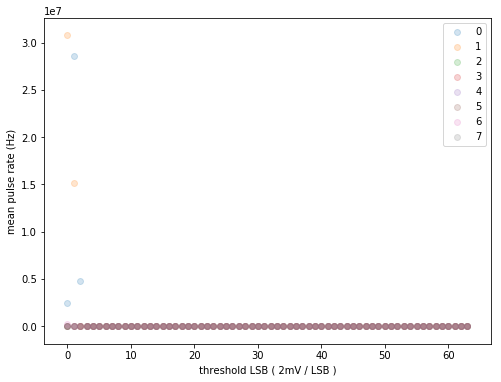

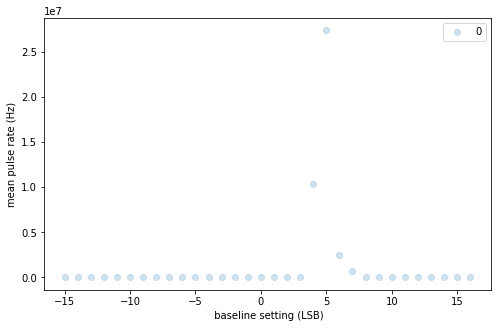

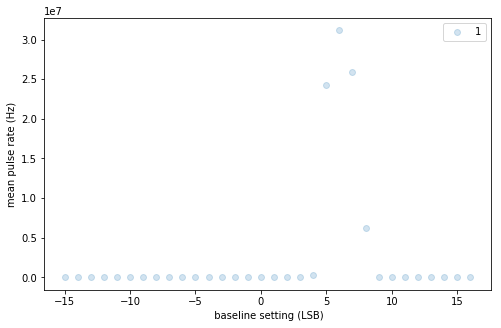

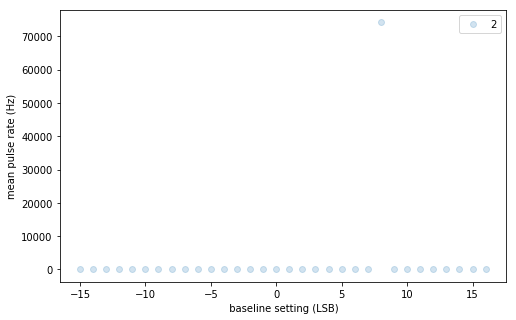

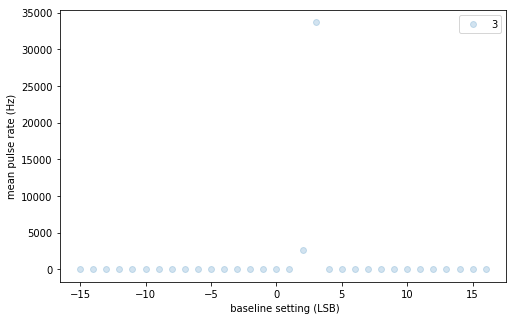

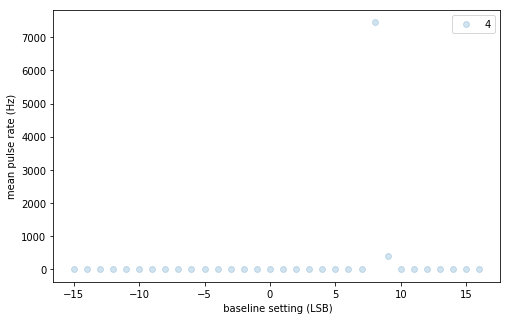

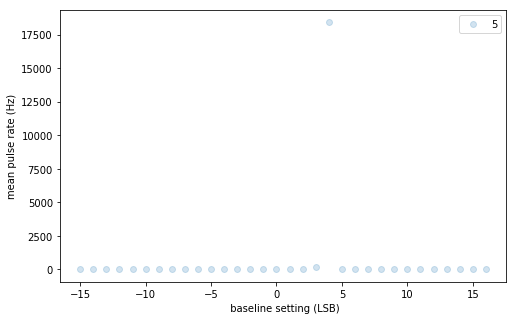

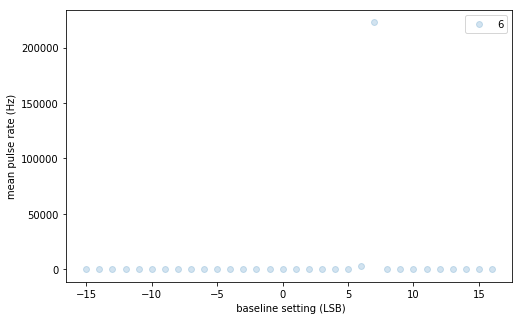

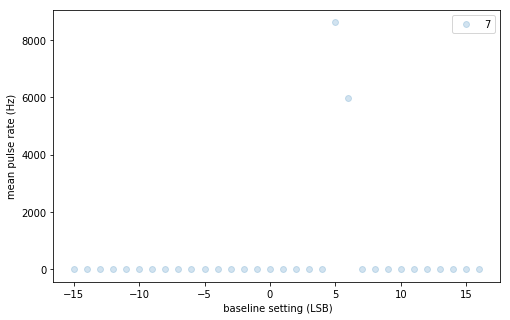

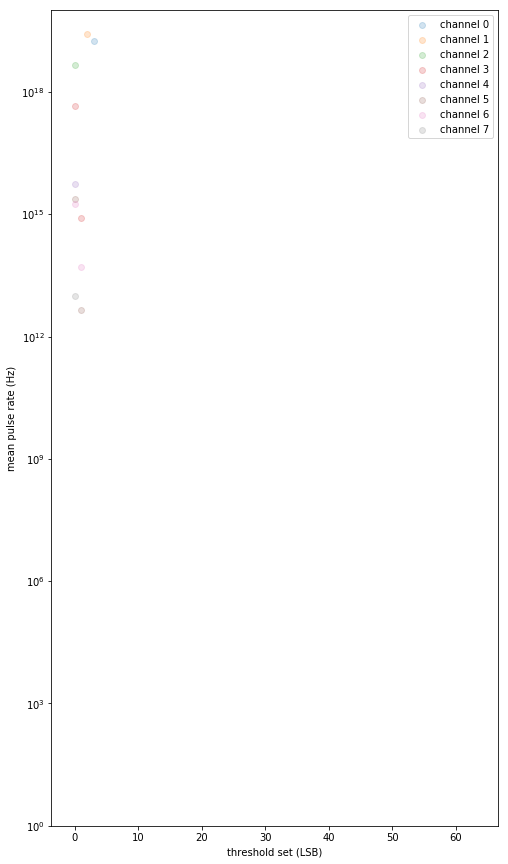

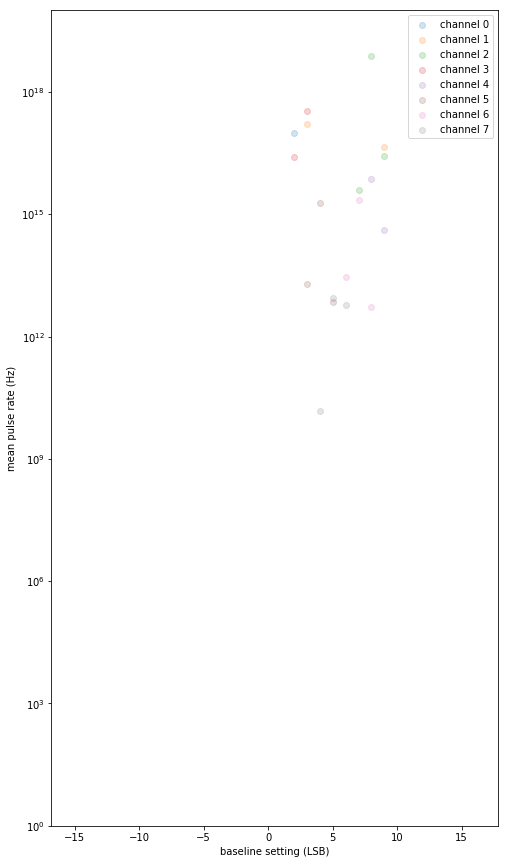

In [3]:
names=[ "4000"]
for name in names:
    ptc.init_active_boards()  

    print(" parallel baseline scan board, ", name)
    #baseline_calib.baseline_calib_by_noise(name, dummy_calib=True,individual=True) 
    baseline_calib.baseline_calib_by_noise(name, dummy_calib=True,individual=False)     
   # baseline_calib.set_baselines_individual(name, [15]*16 )   
    #threshold scan with pulser ON!
    print("threshold scan, at baseline from config")
    baseline_calib.char_noise_by_thresh_scan(name,dummy_calib=True)    
    #read threshold_scan from database:
    dummy_calib = db.get_calib_json_by_name(name,dummy_calib=True)
    tsbl_scan_raw = dummy_calib["tsbl_scan_raw"]
    tsbl_range    = dummy_calib["tsbl_range"]

     #plot current scan results for all channels:


    # baseline scan:
    noise_scan_raw = dummy_calib["noise_scan_raw"]
    noise_range    = dummy_calib["bl_range"]

    # threshold scan
    plt.rcParams["figure.figsize"] = (8,6)
    for i in range(0,8):
      plt.scatter(tsbl_range,tsbl_scan_raw[i],alpha=0.2,label = "{:d}".format(i))

      plt.legend()
      plt.xlabel(" threshold LSB ( 2mV / LSB ) ")
      plt.ylabel("mean pulse rate (Hz)")
      #plt.yscale('log') 
    plt.show()
    plt.rcParams["figure.figsize"] = (8,5)
    #baselines:
    for i in range(0,8):
       plt.scatter(noise_range,noise_scan_raw[i],alpha=0.2,label = "{:d}".format(i))

       plt.legend()
       plt.xlabel("  baseline setting (LSB) ")
       plt.ylabel("mean pulse rate (Hz)")
       #plt.yscale('log') 
       plt.show()
    # staggerd plots:
    plt.rcParams["figure.figsize"] = (8,15)
    for i in range(0,8):
          nums = np.array(tsbl_scan_raw[i])*10**(16-i)
          plt.scatter(tsbl_range,nums,alpha=0.2,label = "channel {:d}".format(i))

          plt.legend()
          plt.xlabel("threshold set (LSB)")
          plt.ylabel("mean pulse rate (Hz)")
          plt.yscale('log') 
          plt.ylim(ymax = 1E20, ymin = 1E0)
    plt.show()

    plt.rcParams["figure.figsize"] = (8,15)
    for i in range(0,8):
         nums = np.array(noise_scan_raw[i])*10**(16-i)
         plt.scatter(noise_range, nums,alpha=0.2,label = "channel {:d}".format(i))

         plt.legend()
         plt.xlabel("baseline setting (LSB)")
         plt.ylabel("mean pulse rate (Hz)")

    plt.yscale('log') 
    plt.ylim(ymax = 1E20, ymin = 1E0)
    plt.show()
ptc.init_active_boards()  


In [4]:
ptc.init_active_boards()  

threshold scan, at baseline from config


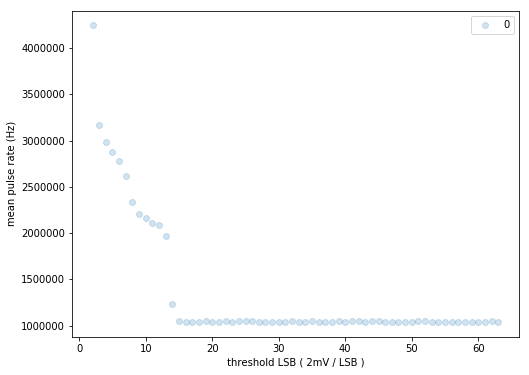

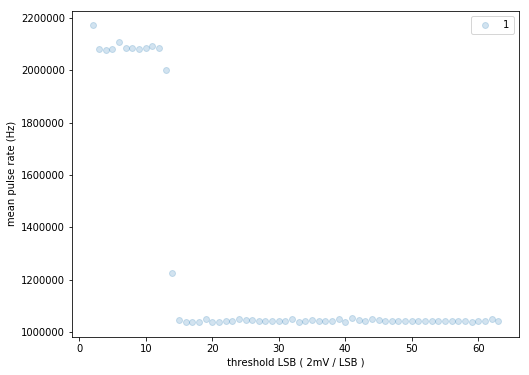

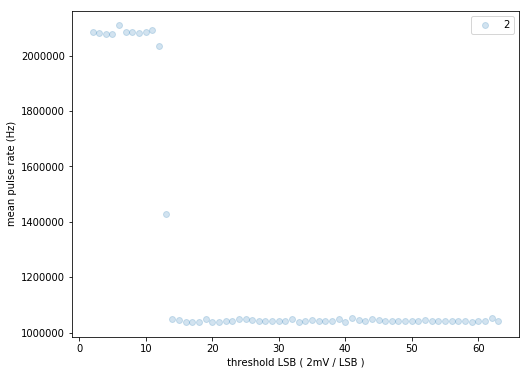

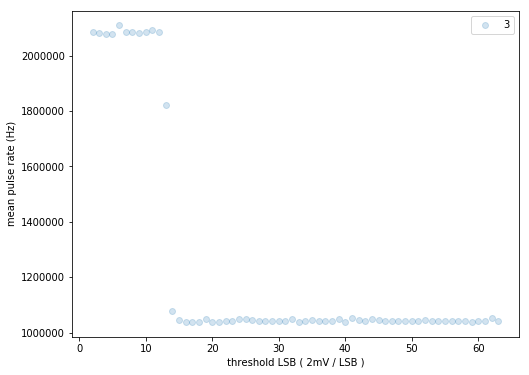

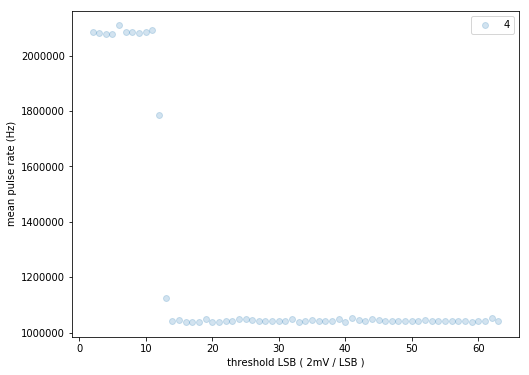

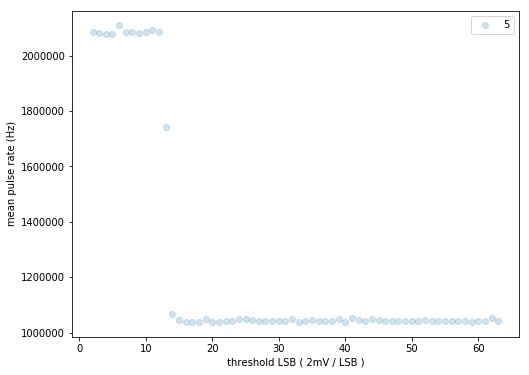

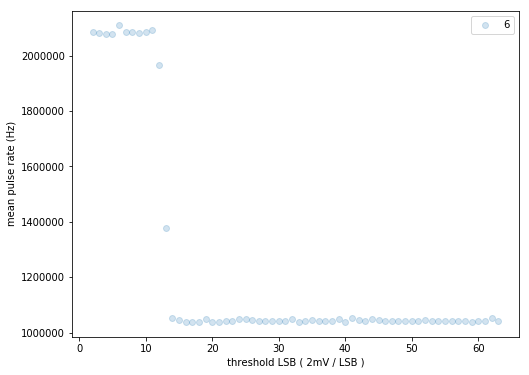

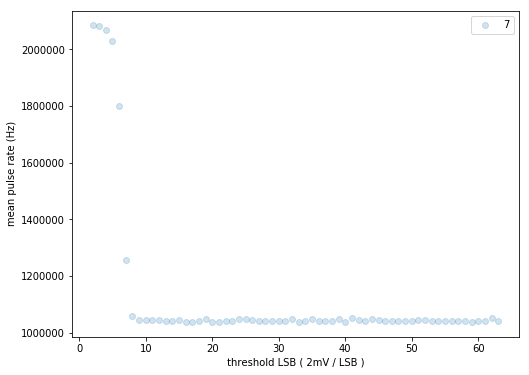

13312

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
curl: (52) Empty reply from server
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
curl: (52) Empty reply from server
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
curl: (52) Empty reply from server


In [43]:
##s-curve (threshold) scan
import os
#pulse generator, switch channel 2 on
os.system("curl 'http://jspc29:1290/tools/vxi/vxi.pl?192.168.0.42&%3AOUTPUT2%20ON'")
#for freq in [1000,10000,50000,100000,1000000]:
if True:
    freq = 1000000
    os.system("curl 'http://jspc29:1290/tools/vxi/vxi.pl?192.168.0.42&%3ASOUR2%3AFREQ%20{:d}'".format(freq))

    ptc.init_active_boards()  
    print("threshold scan, at baseline from config")
    baseline_calib.char_noise_by_thresh_scan(name,dummy_calib=True)    
    #read threshold_scan from database:
    dummy_calib = db.get_calib_json_by_name(name,dummy_calib=True)
    tsbl_scan_raw = dummy_calib["tsbl_scan_raw"]
    tsbl_range    = dummy_calib["tsbl_range"]

     #plot current scan results for all channels:

    # threshold scan
    plt.rcParams["figure.figsize"] = (8,6)
    del tsbl_range[:2] 
    for i in range(0,8):
      del tsbl_scan_raw[i][:2] 
      plt.scatter(tsbl_range,tsbl_scan_raw[i],alpha=0.2,label = "{:d}".format(i))

      plt.legend()
      plt.xlabel(" threshold LSB ( 2mV / LSB ) ")
      plt.ylabel("mean pulse rate (Hz)")
      #plt.yscale('log') 
      plt.show()
#pulse generator, switch channel 2 off   
os.system("curl 'http://jspc29:1290/tools/vxi/vxi.pl?192.168.0.42&%3AOUTPUT2%20OFF'")

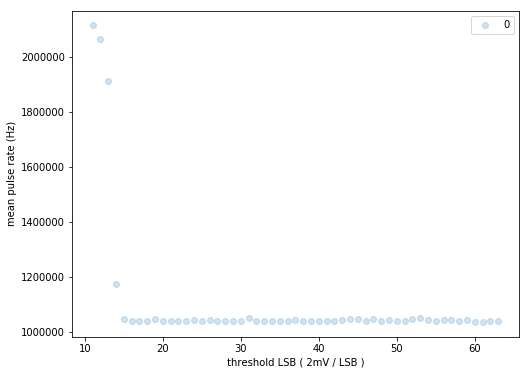

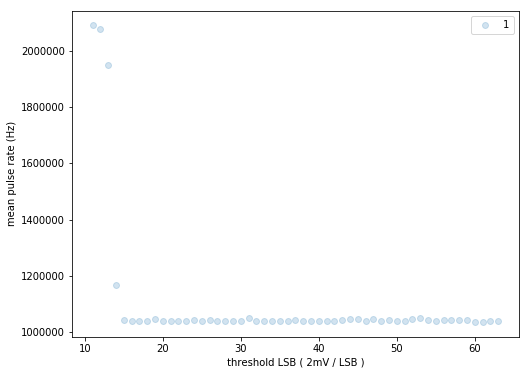